<a href="https://colab.research.google.com/github/sahilfaizal01/Stock-Feature-Prediction-using-News-Based-ESG-Sentiment-Analysis/blob/main/FDS_EDA_Stock_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing The Dataset**

In [2]:
import pandas as pd
df = pd.read_csv('/content/meta_sentiment.csv')
df.head()

,Unnamed: 0,sentiment_score,Economy - Monetary,Financial Markets,Earnings,Mergers & Acquisitions,Technology,Finance,Real Estate & Construction,Energy & Transportation,...,Manufacturing,Blockchain,Life Sciences,IPO,Economy - Macro,open,high,low,close,volume
0,2022-01-03,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.44,0.67,...,0.571212,0.445805,0.466667,0.158519,0.280378,338.295,341.0816,337.1900,338.54,14562849
1,2022-01-04,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.44,0.67,...,0.571212,0.445805,0.466667,0.158519,0.280378,339.950,343.0854,331.8711,336.53,15997974
2,2022-01-05,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.44,0.67,...,0.571212,0.445805,0.466667,0.158519,0.280378,333.020,335.7600,323.8400,324.17,20564521
3,2022-01-06,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.44,0.67,...,0.571212,0.445805,0.466667,0.158519,0.280378,322.820,339.1650,322.7200,332.46,27962809
4,2022-01-07,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.44,0.67,...,0.571212,0.445805,0.466667,0.158519,0.280378,332.740,337.0000,328.8801,331.79,14722020


In [3]:
df.tail()

,Unnamed: 0,sentiment_score,Economy - Monetary,Financial Markets,Earnings,Mergers & Acquisitions,Technology,Finance,Real Estate & Construction,Energy & Transportation,...,Manufacturing,Blockchain,Life Sciences,IPO,Economy - Macro,open,high,low,close,volume
529,2023-11-27,0.173760,0.354739,0.532948,0.664799,0.152536,0.785417,0.726027,0.688889,0.712963,...,0.747175,0.440430,0.712644,0.417292,0.158519,336.18,339.900,334.2000,334.70,15684454
530,2023-11-28,0.173163,0.406610,0.518038,0.601237,0.178584,0.736317,0.639474,0.652516,0.676357,...,0.623661,0.392392,0.583588,0.253509,0.178760,333.40,339.375,333.4000,338.99,12637245
531,2023-11-29,0.168962,0.387225,0.557257,0.603260,0.182041,0.731106,0.665000,0.739216,0.710494,...,0.642024,0.385729,0.714410,0.352677,0.167479,339.69,339.900,330.7800,332.20,16024497
532,2023-11-30,0.176685,0.410365,0.538478,0.616144,0.172273,0.772312,0.695710,0.694444,0.717320,...,0.680510,0.339561,0.781713,0.291561,0.190695,331.89,333.500,322.4037,327.15,23146387
533,2023-12-01,0.176685,0.410365,0.538478,0.616144,0.172273,0.772312,0.695710,0.694444,0.717320,...,0.680510,0.339561,0.781713,0.291561,0.190695,325.48,326.860,320.7600,324.82,15276375


# **Dataset Insights**

In [4]:
df.columns

Index(['Unnamed: 0', 'sentiment_score', 'Economy - Monetary',
       'Financial Markets', 'Earnings', 'Mergers & Acquisitions', 'Technology',
       'Finance', 'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'open', 'high', 'low',
       'close', 'volume'],
      dtype='object')

In [5]:
df.shape

(534, 22)

In [6]:
df = df.rename(columns={'Unnamed: 0': 'date'}) # renaming column to 'date'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        534 non-null    object 
 1   sentiment_score             534 non-null    float64
 2   Economy - Monetary          534 non-null    float64
 3   Financial Markets           534 non-null    float64
 4   Earnings                    534 non-null    float64
 5   Mergers & Acquisitions      534 non-null    float64
 6   Technology                  534 non-null    float64
 7   Finance                     534 non-null    float64
 8   Real Estate & Construction  534 non-null    float64
 9   Energy & Transportation     534 non-null    float64
 10  Economy - Fiscal            534 non-null    float64
 11  Retail & Wholesale          534 non-null    float64
 12  Manufacturing               534 non-null    float64
 13  Blockchain                  534 non

# **Data Preparation**

In [8]:
stock_df = df[['date','open','close','high','low','volume','sentiment_score']] # selecting a data subset
stock_df.head()

,date,open,close,high,low,volume,sentiment_score
0,2022-01-03,338.295,338.54,341.0816,337.1900,14562849,-0.123265
1,2022-01-04,339.950,336.53,343.0854,331.8711,15997974,-0.123265
2,2022-01-05,333.020,324.17,335.7600,323.8400,20564521,-0.123265
3,2022-01-06,322.820,332.46,339.1650,322.7200,27962809,-0.123265
4,2022-01-07,332.740,331.79,337.0000,328.8801,14722020,-0.123265


In [9]:
stock_df['date'] = pd.to_datetime(stock_df['date'].apply(lambda x: x.split()[0])) # Selecting only date
stock_df.set_index('date',drop=True,inplace=True) # Setting date column as index
stock_df.head()

<ipython-input-9-9e75c89b140f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['date'] = pd.to_datetime(stock_df['date'].apply(lambda x: x.split()[0])) # Selecting only date


,open,close,high,low,volume,sentiment_score
date,,,,,,
2022-01-03,338.295,338.54,341.0816,337.1900,14562849,-0.123265
2022-01-04,339.950,336.53,343.0854,331.8711,15997974,-0.123265
2022-01-05,333.020,324.17,335.7600,323.8400,20564521,-0.123265
2022-01-06,322.820,332.46,339.1650,322.7200,27962809,-0.123265
2022-01-07,332.740,331.79,337.0000,328.8801,14722020,-0.123265


In [10]:
stock_df.describe()

,open,close,high,low,volume,sentiment_score
count,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000
mean,215.448687,215.751676,219.162292,212.294100,3.003505e+07,0.083225
std,69.510122,69.327675,69.991741,68.671183,1.971608e+07,0.095843
min,90.080000,88.910000,90.457600,88.090000,5.467488e+06,-0.156614
25%,161.691250,161.145000,165.287500,159.317500,1.955056e+07,0.002356
50%,204.617500,205.540000,208.805000,201.390000,2.539837e+07,0.136785
75%,287.412500,287.032500,290.322500,284.415000,3.366994e+07,0.154303
max,340.130000,341.490000,343.085400,338.580000,2.323166e+08,0.309586


In [11]:
duplicate_records = stock_df[stock_df.duplicated()]

# Display the duplicate records
print("Duplicate Records:")
print(duplicate_records)

Duplicate Records:
              open   close    high     low    volume  sentiment_score
date                                                                 
2023-01-20  135.89  139.37  139.94  134.61  28688630         0.132353
2023-01-31  147.95  148.97  149.88  147.52  29842109         0.134606


In [12]:
stock_data_2023 = stock_df[(stock_df.index.year >= 2023)]
stock_data_2022 = stock_df[(stock_df.index.year >= 2022) & (stock_df.index.year < 2023)]

## On Crafted Features

In [13]:
stock_df['open-high'] = stock_df['open'] - stock_df['high']
stock_df['open-low'] = stock_df['open'] - stock_df['low']
stock_df['close-high'] = stock_df['close'] - stock_df['high']
stock_df['close-low'] = stock_df['close'] - stock_df['low']
stock_df['high-low'] = stock_df['high'] - stock_df['low']
stock_df['open-close'] = stock_df['open'] - stock_df['close']
stock_df.head()

<ipython-input-13-8291caeed998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['open-high'] = stock_df['open'] - stock_df['high']
<ipython-input-13-8291caeed998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['open-low'] = stock_df['open'] - stock_df['low']
<ipython-input-13-8291caeed998>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,open,close,high,low,volume,sentiment_score,open-high,open-low,close-high,close-low,high-low,open-close
date,,,,,,,,,,,,
2022-01-03,338.295,338.54,341.0816,337.1900,14562849,-0.123265,-2.7866,1.1050,-2.5416,1.3500,3.8916,-0.245
2022-01-04,339.950,336.53,343.0854,331.8711,15997974,-0.123265,-3.1354,8.0789,-6.5554,4.6589,11.2143,3.420
2022-01-05,333.020,324.17,335.7600,323.8400,20564521,-0.123265,-2.7400,9.1800,-11.5900,0.3300,11.9200,8.850
2022-01-06,322.820,332.46,339.1650,322.7200,27962809,-0.123265,-16.3450,0.1000,-6.7050,9.7400,16.4450,-9.640
2022-01-07,332.740,331.79,337.0000,328.8801,14722020,-0.123265,-4.2600,3.8599,-5.2100,2.9099,8.1199,0.950


# **VISUALIZATIONS**

## **Open-Close Price Variation With Time**

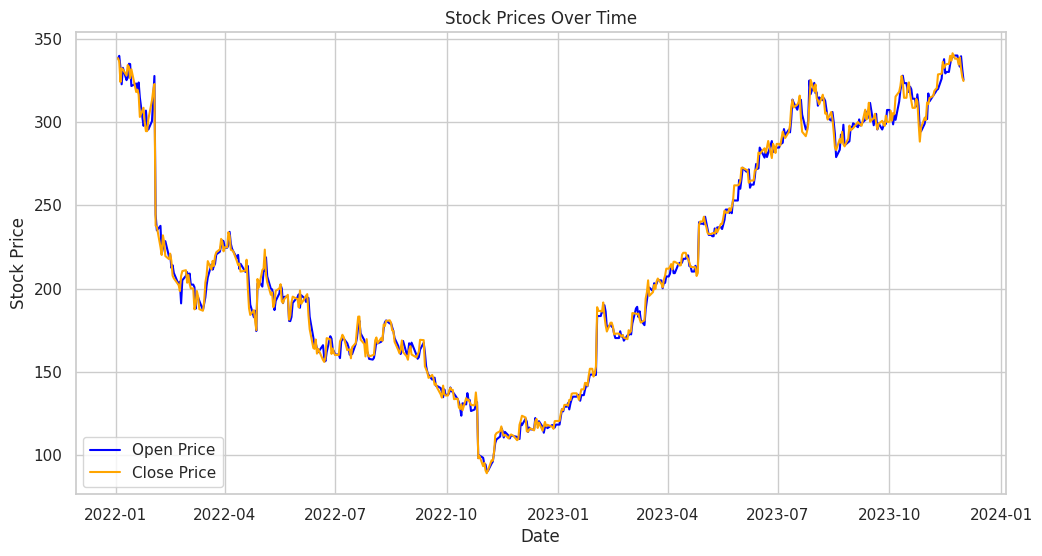

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='open', data=stock_df, label='Open Price', color='blue')
sns.lineplot(x='date', y='close', data=stock_df, label='Close Price', color='orange')

# Set plot title and labels
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.savefig('Stock-Prices-Over-Time.png',dpi=400)
# Show legend
plt.legend()

# Show the plot
plt.show()


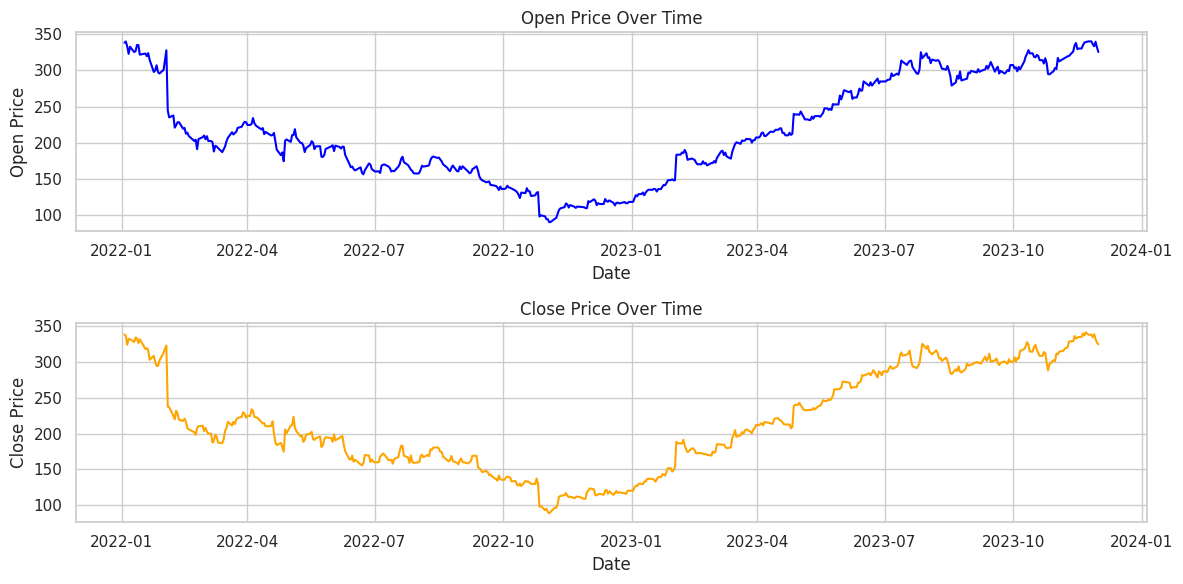

In [15]:
sns.set(style="whitegrid")

# Create separate plots for Open and Close prices
plt.figure(figsize=(12, 6))

# Plot Open Price
plt.subplot(2, 1, 1)
sns.lineplot(x='date', y='open', data=stock_df, color='blue')
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
# Plot Close Price
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='close', data=stock_df, color='orange')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.savefig('Open-Close-Price-Over-Time.png',dpi=400)
# Adjust layout to prevent overlap
# Show the plots
plt.show()

## **Open-Close Price Variation with Sentiment-Score and Time**

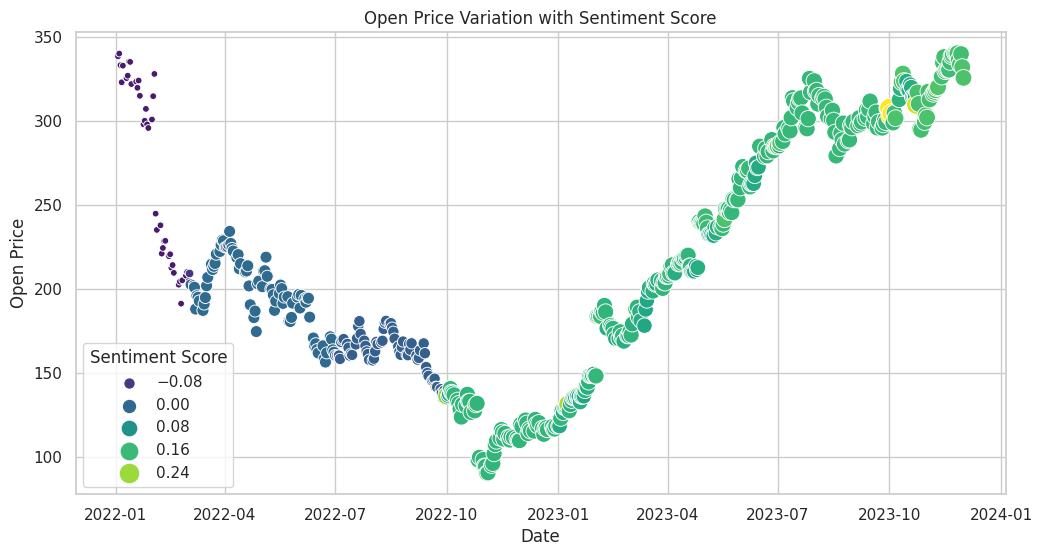

In [16]:
sns.set(style="whitegrid")

# Create a scatter plot for Open and Close prices with Sentiment score
plt.figure(figsize=(12, 6))

# Scatter plot for Open Price with Sentiment score
sns.scatterplot(x='date', y='open', hue='sentiment_score', data=stock_df, palette='viridis', size='sentiment_score', sizes=(10, 200))
plt.title('Open Price Variation with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend(title='Sentiment Score')
plt.savefig('Open-Price-Sentiment-Over-Time.png',dpi=400)
# Show the plot
plt.show()

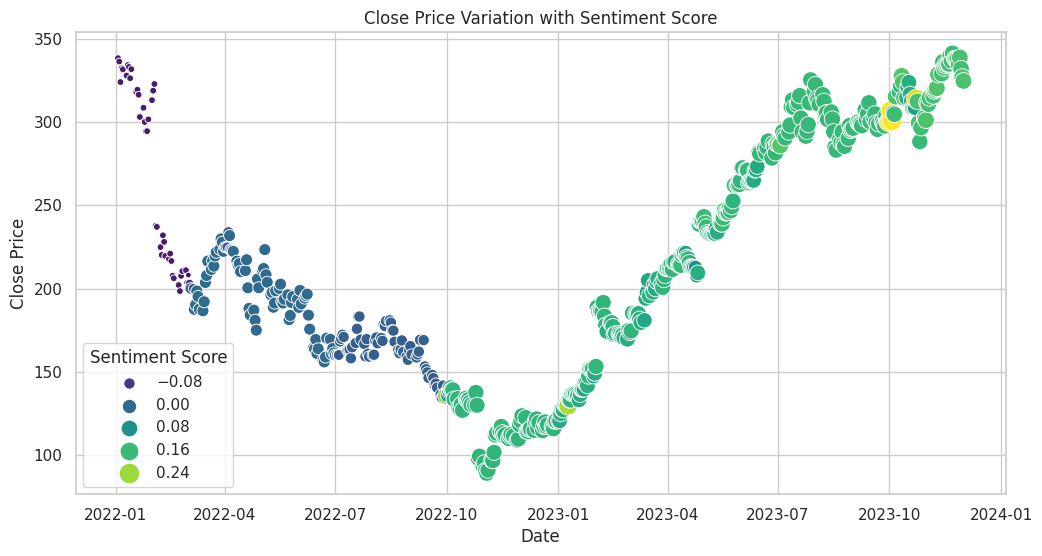

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='close', hue='sentiment_score', data=stock_df, palette='viridis', size='sentiment_score', sizes=(10, 200))
plt.title('Close Price Variation with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Sentiment Score')
plt.savefig('Close-Price-Sentiment-Over-Time.png',dpi=400)
plt.show()

## **High-Low Price Variation with Time**

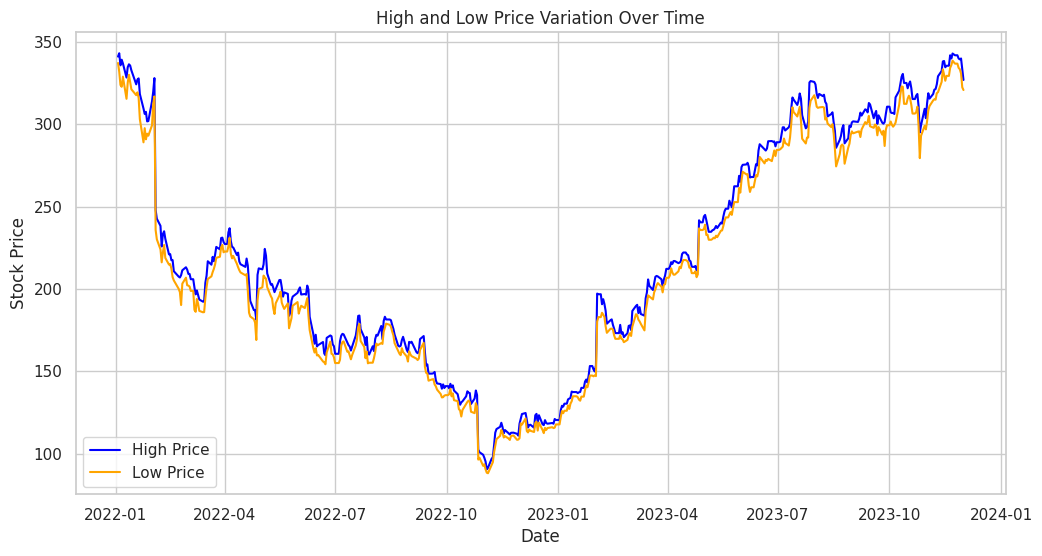

In [18]:
sns.set(style="whitegrid")

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='high', data=stock_df, label='High Price', color='blue')
sns.lineplot(x='date', y='low', data=stock_df, label='Low Price', color='orange')

# Set plot title and labels
plt.title('High and Low Price Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.savefig('High-Low-Prices-Over-Time.png',dpi=400)
# Show legend
plt.legend()

# Show the plot
plt.show()

## **Histogram Analysis**
## Variation of sentiment score and closing price over time

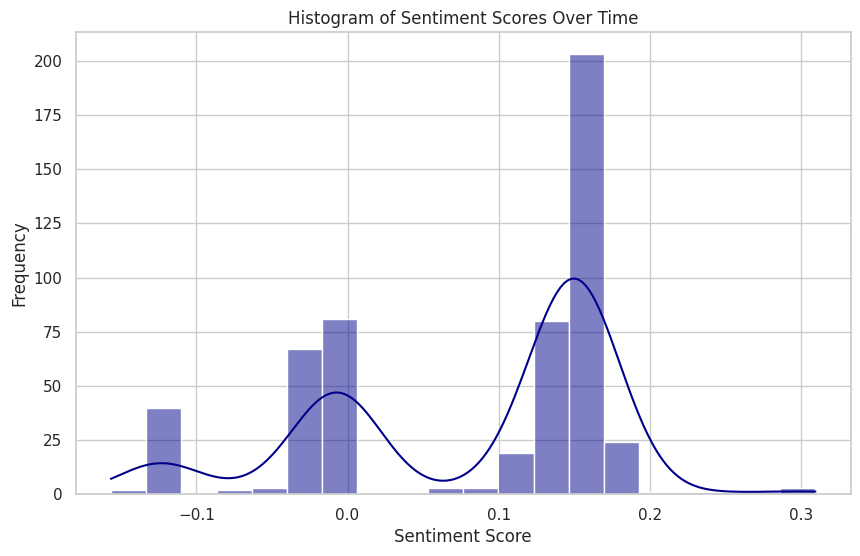

In [19]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='darkblue')

# Set plot title and labels
plt.title('Histogram of Sentiment Scores Over Time')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.savefig('Histogram-of-Sentiment-Scores-Over-Time.png',dpi=400)
# Show the plot
plt.show()

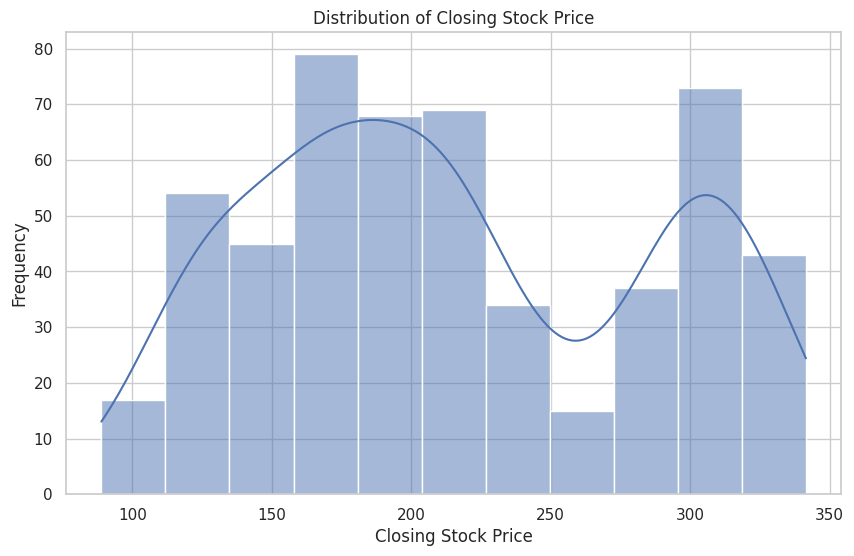

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.savefig('closing-price-hist-over-time.png',dpi=400)
plt.show()

## **Variation of Stock Volume with Time and Sentiment Score**

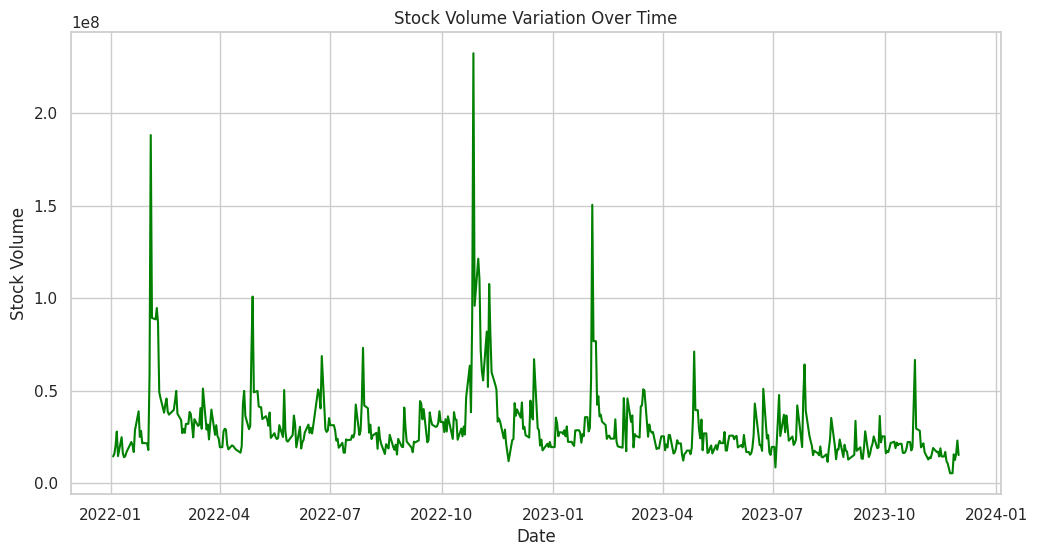

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='volume', data=stock_df, color='green')

plt.title('Stock Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.savefig('Stock-Volume-Variation-Over-Time.png',dpi=400)
plt.show()

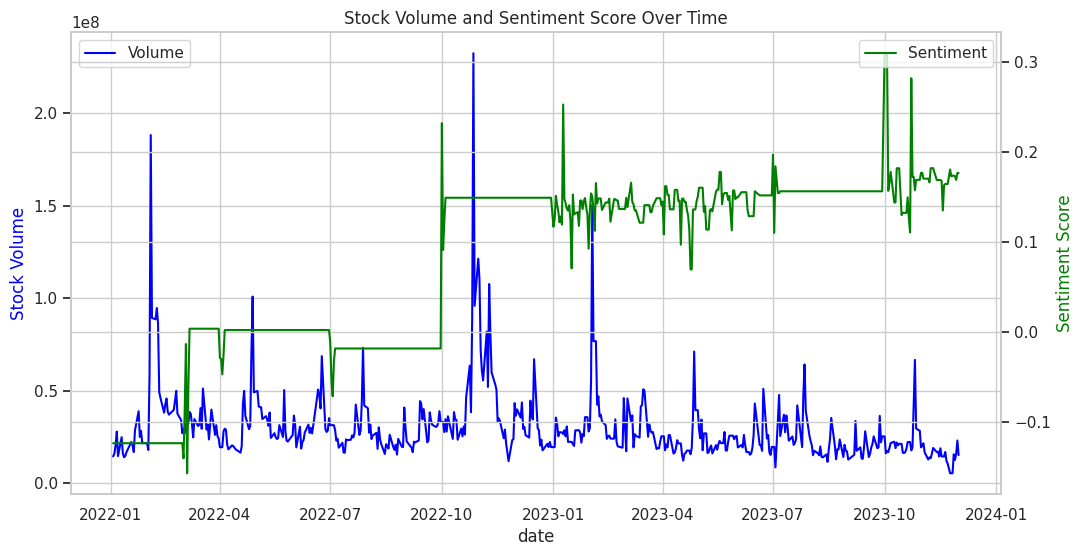

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(x='date', y='volume', data=stock_df, label='Volume', color='blue')
ax1.set_ylabel('Stock Volume', color='blue')

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='date', y='sentiment_score', data=stock_df, label='Sentiment', color='green')
ax2.set_ylabel('Sentiment Score', color='green')

plt.title('Stock Volume and Sentiment Score Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('Stock Volume and Sentiment Score Over Time.png',dpi=400)
plt.show()

# **Variation of Sentiment Score with Time**

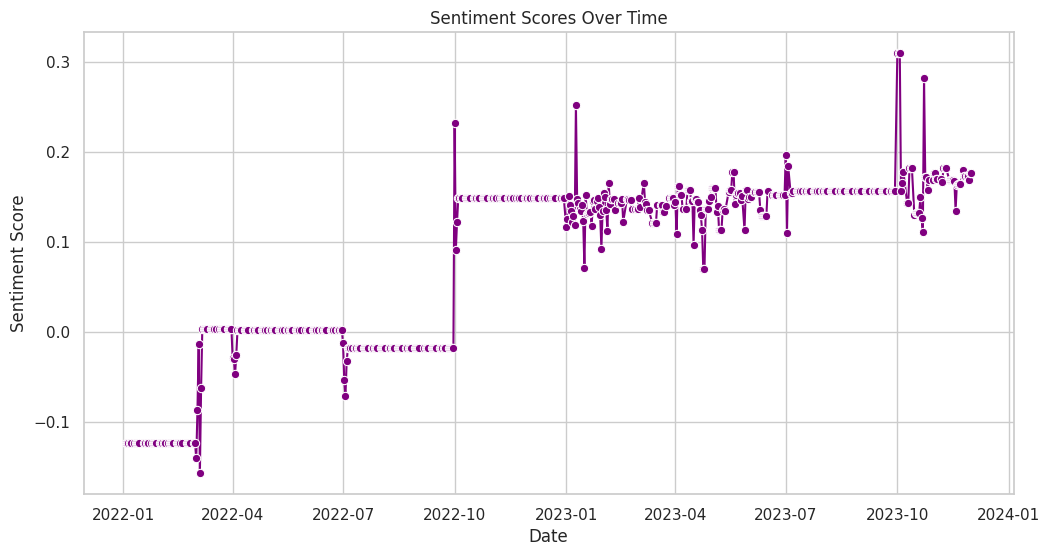

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sentiment_score', data=stock_df, marker='o', color='purple')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.savefig('Sentiment-score-over-time.png',dpi=400)
plt.show()

## **Stock Prices and Volume Traded Over Time**

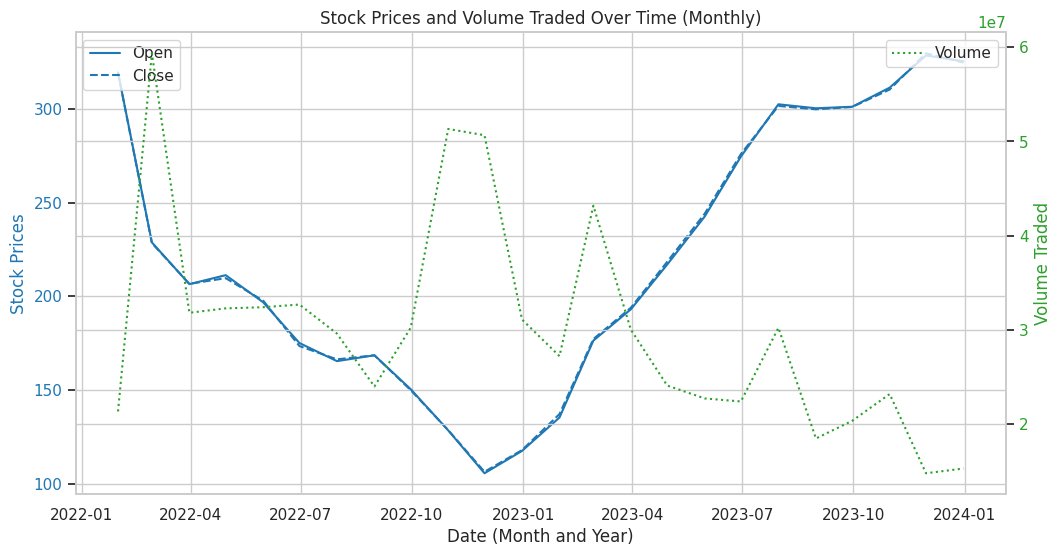

In [24]:
df_monthly = stock_df.resample('M').mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date (Month and Year)')
ax1.set_ylabel('Stock Prices', color=color)
ax1.plot(df_monthly.index, df_monthly['open'], label='Open', color=color)
ax1.plot(df_monthly.index, df_monthly['close'], label='Close', color=color, linestyle='dashed')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Volume Traded', color=color)
ax2.plot(df_monthly.index, df_monthly['volume'], label='Volume', color=color, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Stock Prices and Volume Traded Over Time (Monthly)')
plt.savefig('stockprice-volume-monthly.png',dpi=400)
plt.show()

<ipython-input-25-ed6104eb2b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Year'] = stock_df.index.year


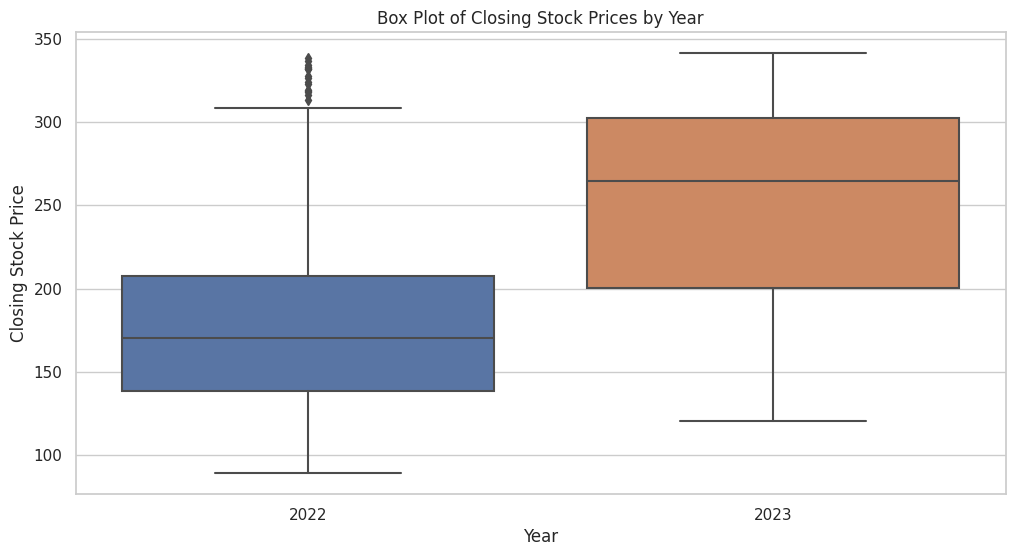

In [25]:
stock_df['Year'] = stock_df.index.year

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='close', data=stock_df)
plt.title('Box Plot of Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.savefig('Box-plot-close-price-year.png',dpi=400)
plt.show()

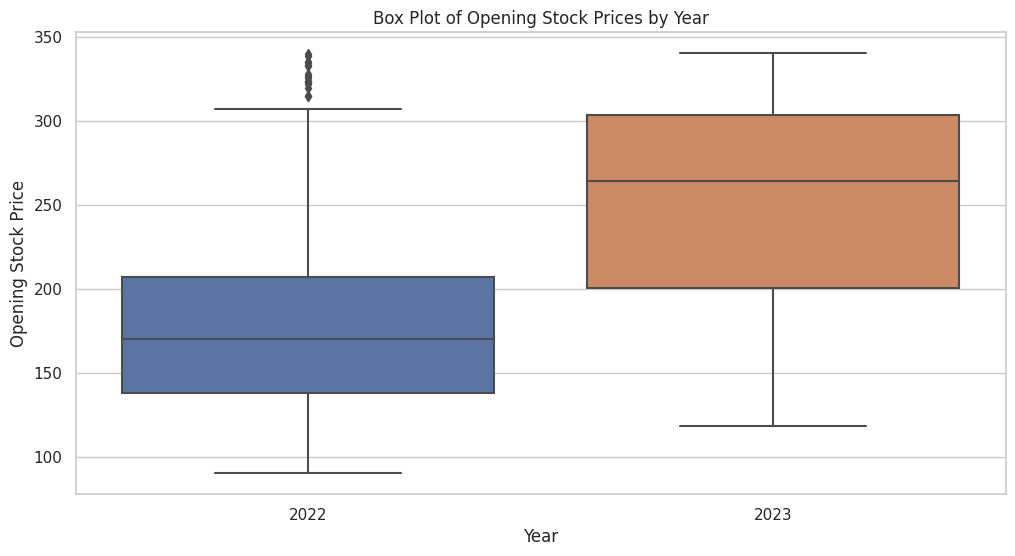

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='open', data=stock_df)
plt.title('Box Plot of Opening Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Opening Stock Price')
plt.savefig('Box-plot-open-price-year.png',dpi=400)
plt.show()

## **Open-High Variation Over Volume**

In [27]:
data2 = stock_df.copy()
data2 = data2.drop(['open','high','low','close','Year'],axis=1)

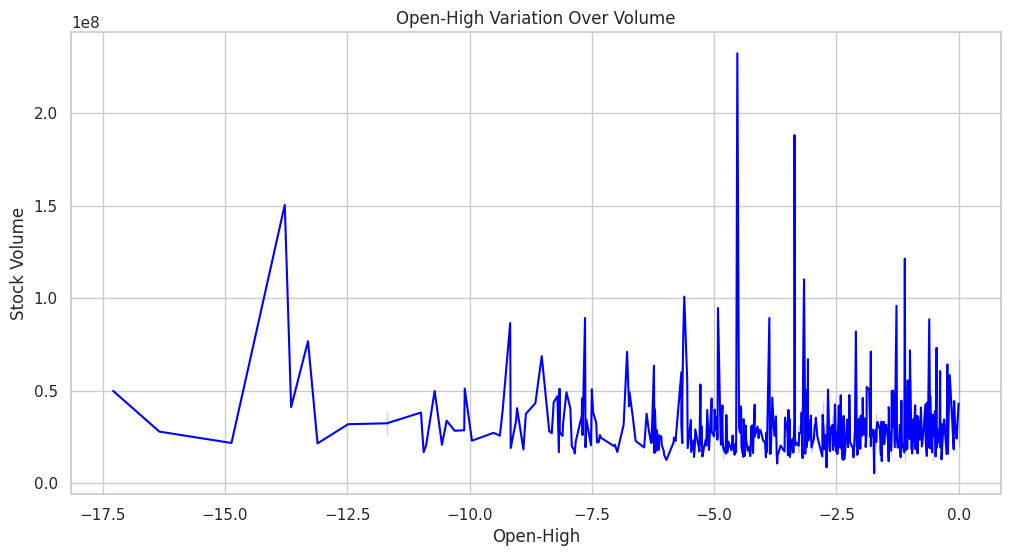

In [28]:
sns.set(style="whitegrid")

# Create a line plot for stock volume with time
plt.figure(figsize=(12, 6))
sns.lineplot(x='open-high', y='volume', data=data2, color='blue')

# Set plot title and labels
plt.title('Open-High Variation Over Volume')
plt.xlabel('Open-High')
plt.ylabel('Stock Volume')
plt.savefig('Open-High Variation Over Volume.png',dpi=400)
# Show the plot
plt.show()

* Observe that the volume is high for larger values of open-high as compared to smaller values of open-high.
* a higher frequency can also be noted

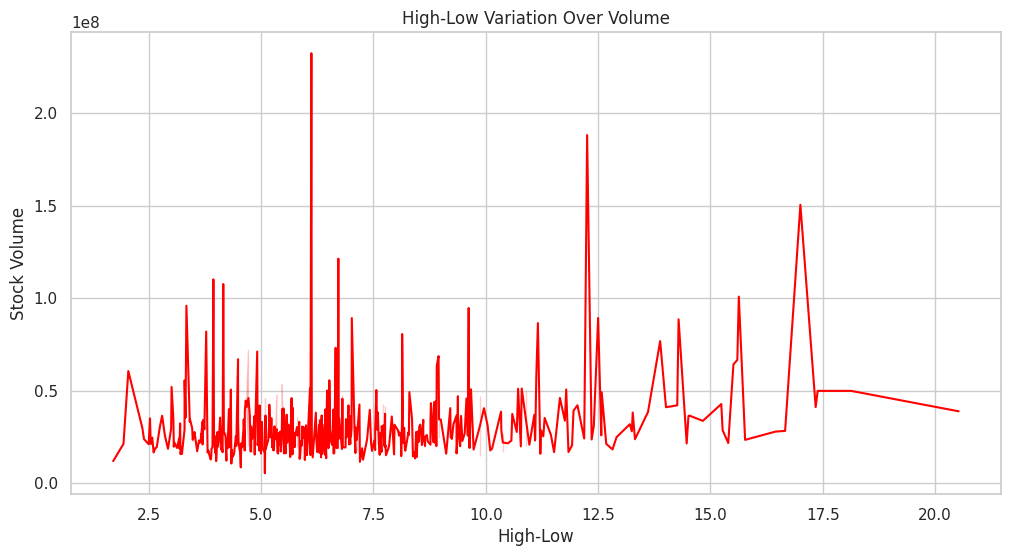

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x='high-low', y='volume', data=data2, color='red')

plt.title('High-Low Variation Over Volume')
plt.xlabel('High-Low')
plt.ylabel('Stock Volume')
plt.savefig('High-Low Variation Over Volume.png',dpi=400)
plt.show()

* From the above graph you can observe the volume of stocks traded was the high for lower values of high-low, with greater variation in distribution
* a higher frequency can also be noted

## **Moving Average Plots**

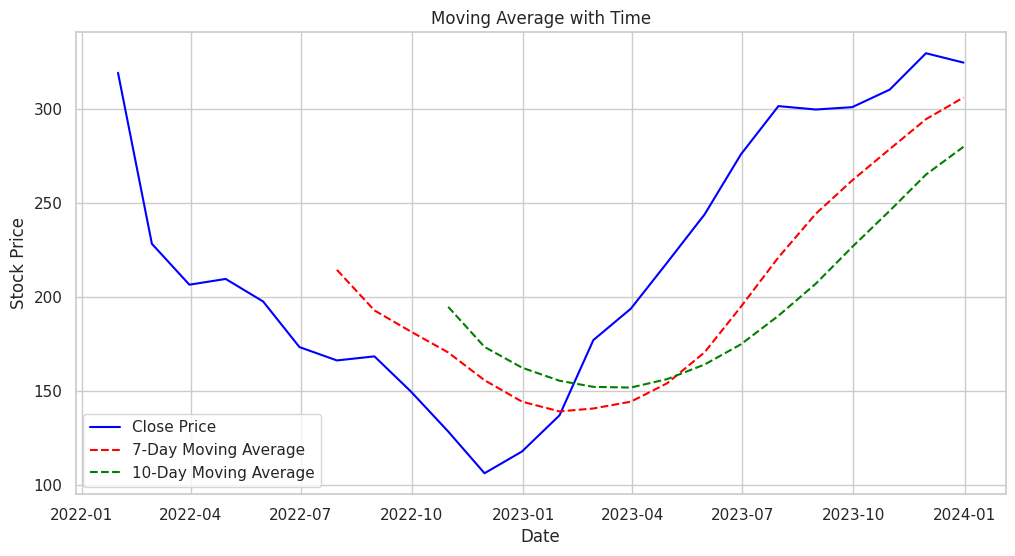

In [30]:
df_monthly = stock_df.resample('M').mean()
df_monthly['MA_7'] = df_monthly['close'].rolling(window=7).mean()
df_monthly['MA_10'] = df_monthly['close'].rolling(window=10).mean()

# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['close'], label='Close Price', color='blue')
plt.plot(df_monthly.index, df_monthly['MA_7'], label='7-Day Moving Average', color='red',linestyle='dashed')
plt.plot(df_monthly.index, df_monthly['MA_10'], label='10-Day Moving Average', color='green',linestyle='dashed')

# Set plot title and labels
plt.title('Moving Average with Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Show the legend
plt.legend()
plt.savefig('Moving-Avg-with-Time.png',dpi=400)
# Show the plot
plt.show()

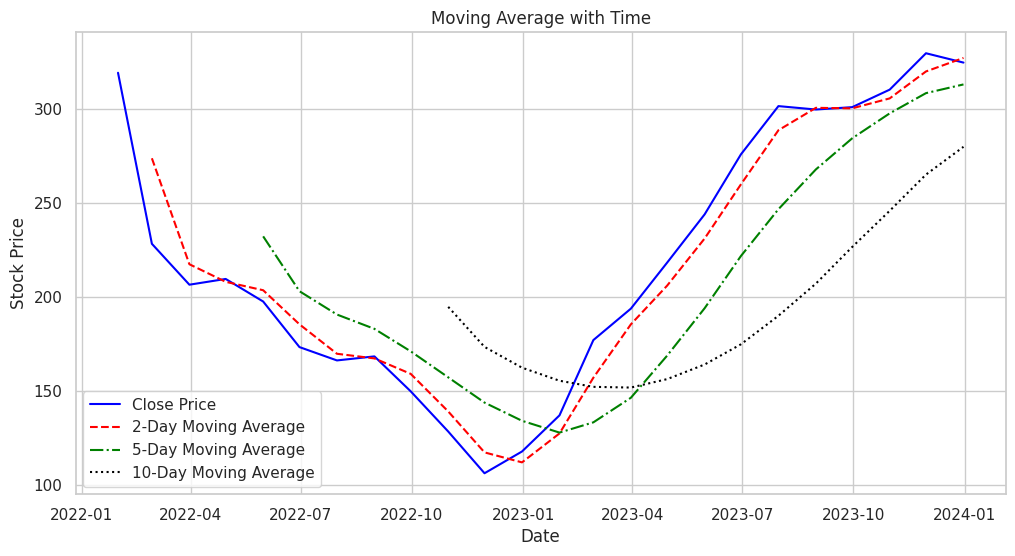

In [31]:
cdf_monthly = stock_df.resample('M').mean()
df_monthly['MA_2'] = df_monthly['close'].rolling(window=2).mean()
df_monthly['MA_5'] = df_monthly['close'].rolling(window=5).mean()
df_monthly['MA_10'] = df_monthly['close'].rolling(window=10).mean()


# Plot the original data and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['close'], label='Close Price', color='blue')
plt.plot(df_monthly.index, df_monthly['MA_2'], label='2-Day Moving Average', color='red',linestyle='dashed')
plt.plot(df_monthly.index, df_monthly['MA_5'], label='5-Day Moving Average', color='green',linestyle='dashdot')
plt.plot(df_monthly.index, df_monthly['MA_10'], label='10-Day Moving Average', color='black',linestyle='dotted')

# Set plot title and labels
plt.title('Moving Average with Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Show the legend
plt.legend()
plt.savefig('Moving-Avg-with-Time-3.png',dpi=400)
# Show the plot
plt.show()

### the cross-overs between the curves of the moving average plots show potential spots of trade (buy or sell)

## **Monthly-Change in StocK pRICES**

<ipython-input-32-db8444036653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_2022['Month'] = stock_data_2022.index.month


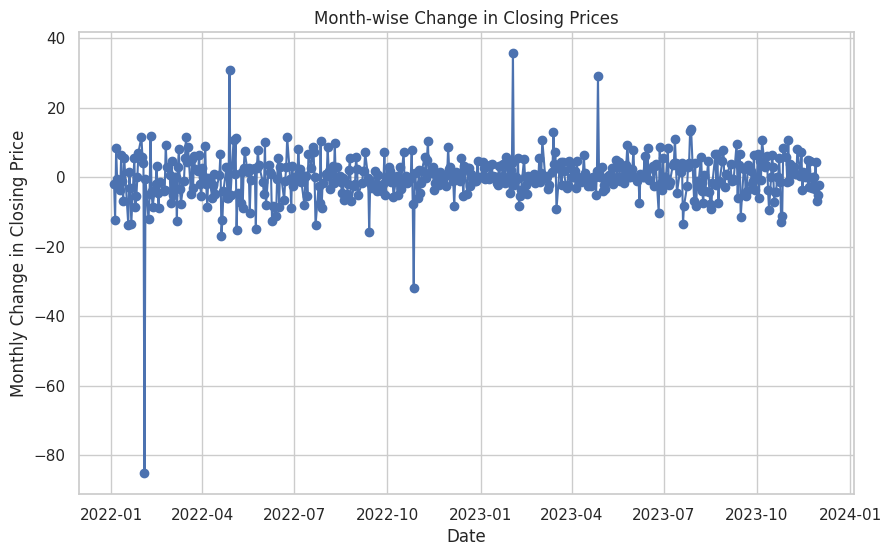

In [32]:
stock_data_2022['Month'] = stock_data_2022.index.month

df['Monthly_Change'] = df['close'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_df.index, df['Monthly_Change'], marker='o', linestyle='-')
plt.title('Month-wise Change in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Monthly Change in Closing Price')
plt.grid(True)
plt.show()

<ipython-input-33-cec3c46f8c1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Monthly_Change'] = stock_df['open'].diff()


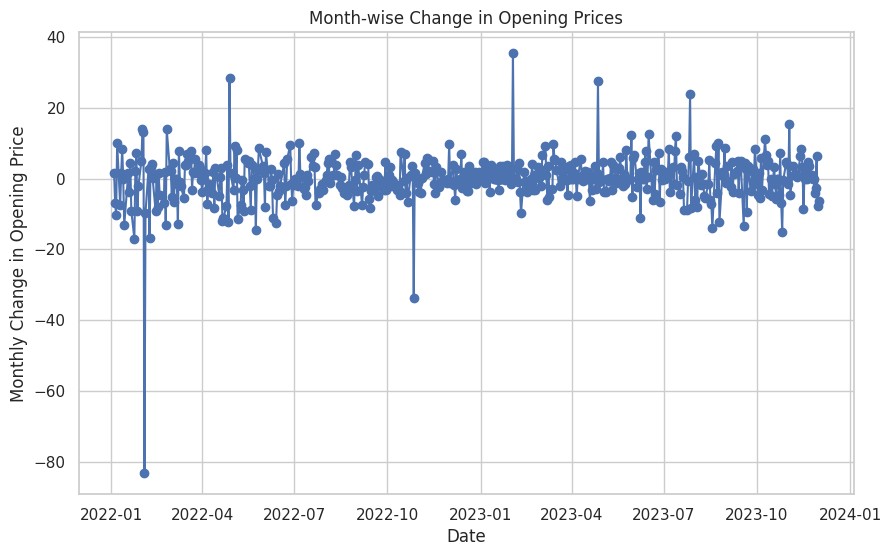

In [33]:
stock_df['Monthly_Change'] = stock_df['open'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_df.index, stock_df['Monthly_Change'], marker='o', linestyle='-')
plt.title('Month-wise Change in Opening Prices')
plt.xlabel('Date')
plt.ylabel('Monthly Change in Opening Price')
plt.grid(True)
plt.show()

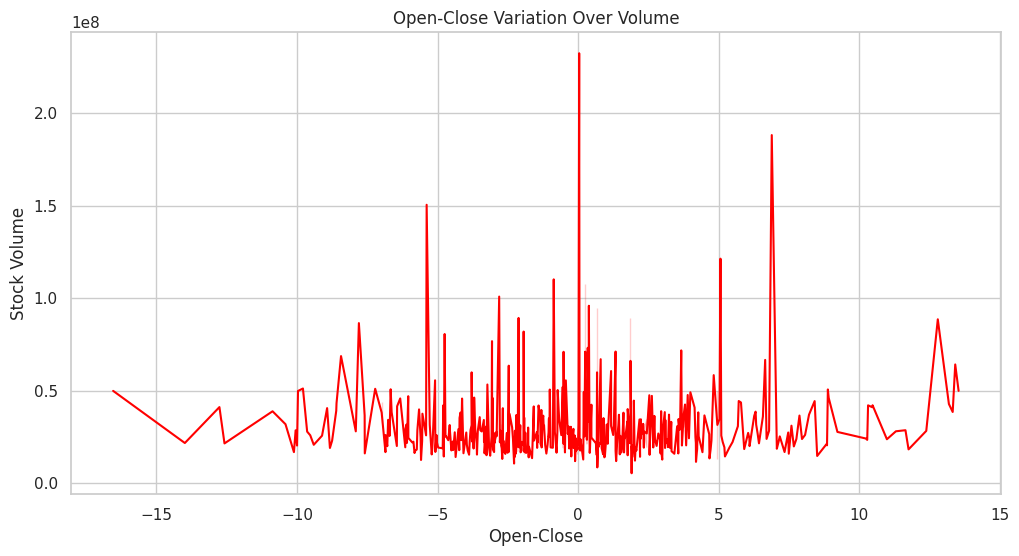

In [34]:
sns.set(style="whitegrid")

# Create a line plot for stock volume with time
plt.figure(figsize=(12, 6))
sns.lineplot(x='open-close', y='volume', data=data2, color='red')

# Set plot title and labels
plt.title('Open-Close Variation Over Volume')
plt.xlabel('Open-Close')
plt.ylabel('Stock Volume')
plt.savefig('Open-Close Variation Over Volume.png',dpi=400)
# Show the plot
plt.show()

## increase in open-close value led to increase in stock volume trade

# **Variation of High Price and Low Price with Volume**

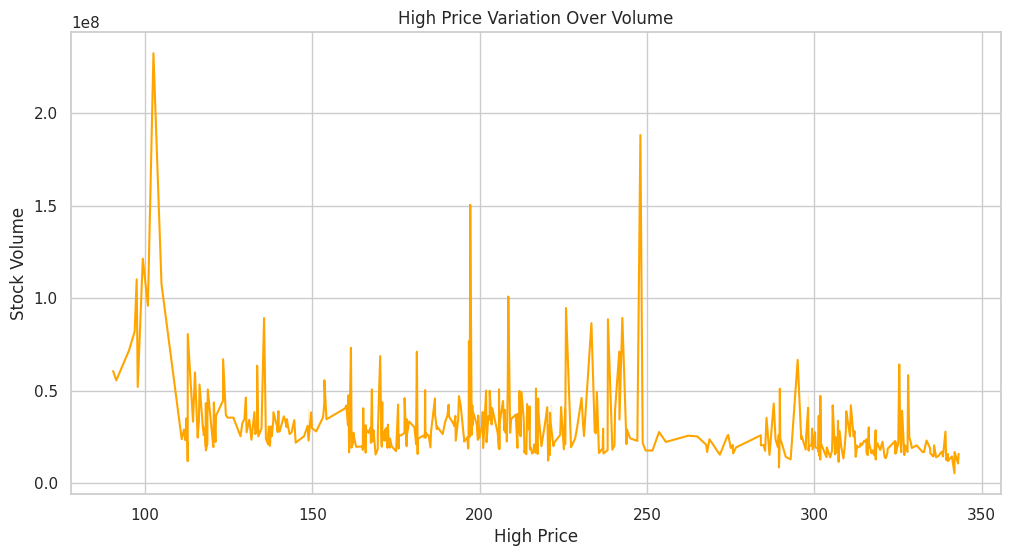

In [35]:
sns.set(style="whitegrid")

# Create a line plot for stock volume with time
plt.figure(figsize=(12, 6))
sns.lineplot(x='high', y='volume', data=stock_df, color='orange')

# Set plot title and labels
plt.title('High Price Variation Over Volume')
plt.xlabel('High Price')
plt.ylabel('Stock Volume')
plt.savefig('High Price Variation Over Volume.png',dpi=400)
# Show the plot
plt.show()

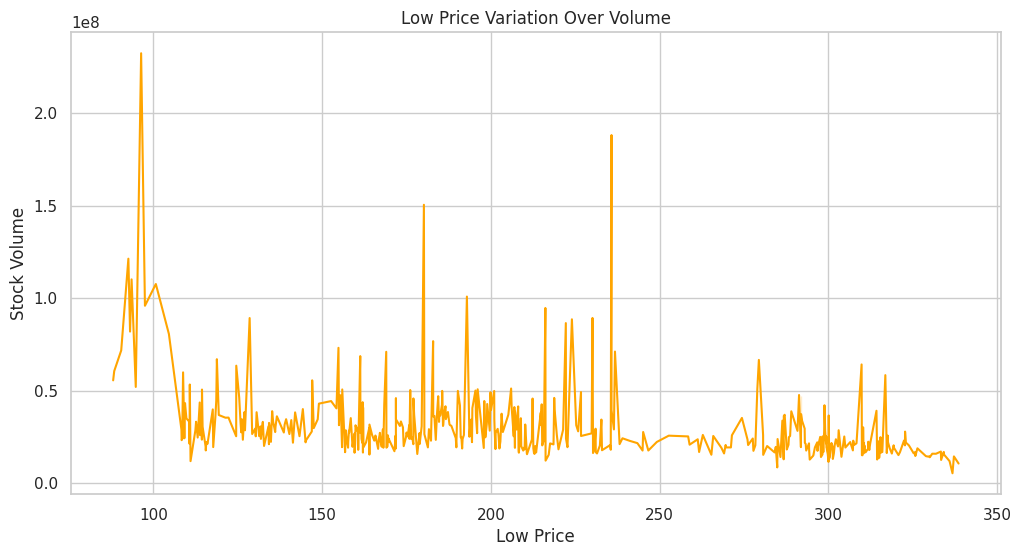

In [36]:
sns.set(style="whitegrid")

# Create a line plot for stock volume with time
plt.figure(figsize=(12, 6))
sns.lineplot(x='low', y='volume', data=stock_df, color='orange')

# Set plot title and labels
plt.title('Low Price Variation Over Volume')
plt.xlabel('Low Price')
plt.ylabel('Stock Volume')
plt.savefig('Low Price Variation Over Volume.png',dpi=400)
# Show the plot
plt.show()

## more stock purchased when the stock price is minimal

# **Daily Return Analysis**

<ipython-input-37-db855567826d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Daily Return'] = stock_df['close'].pct_change()


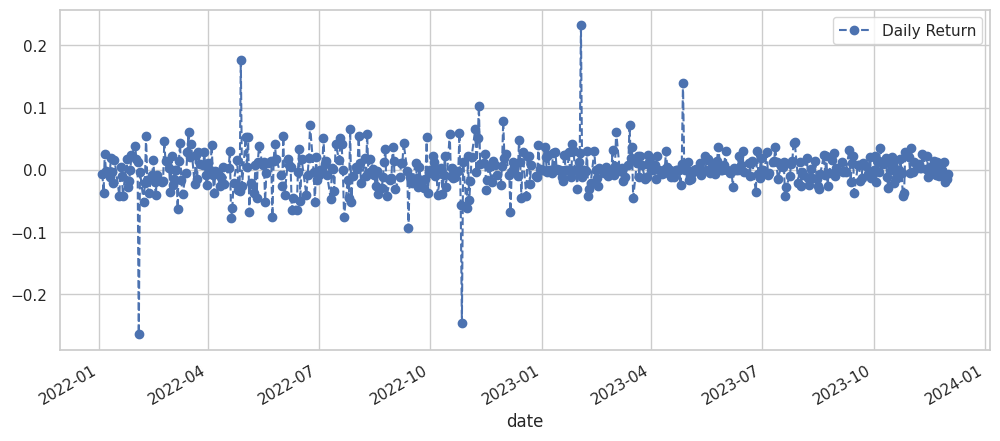

In [37]:
stock_df['Daily Return'] = stock_df['close'].pct_change()
# plot the daily return percentage
stock_df['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

# **Value at Risk**

<ipython-input-38-45400083bd0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_df['Daily Return'].dropna(),bins=100,color='blue')


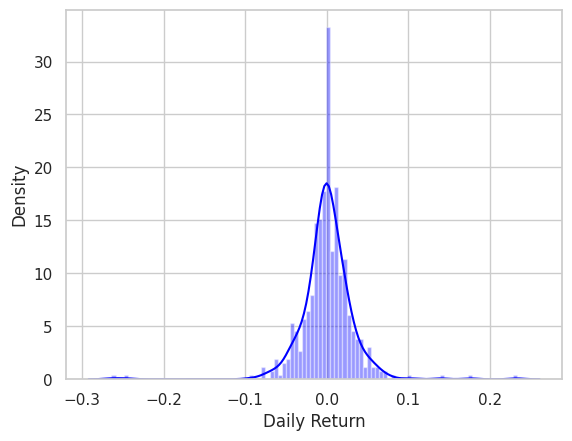

In [38]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(stock_df['Daily Return'].dropna(),bins=100,color='blue')
plt.show()

## Now we can use quantile to get the risk value for the stock.

In [39]:
# The 0.05 empirical quantile of daily returns
emp = stock_df['Daily Return'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.04270945000838777


The 0.05 empirical quantile of daily returns is at -0.042. That means that with 95% confidence, our worst daily loss will not exceed 4.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.042 * 1,000,000 = $42,000.

# **EXPLORING ESG DATA and its relations**

In [40]:
df['e_sentiment'] = (df['Blockchain']+df['Energy & Transportation']+df['Manufacturing']+df['Real Estate & Construction'])/4
df['s_sentiment']=(df['Earnings']+df['Life Sciences']+df['Retail & Wholesale']+df['Technology'])/4
df['g_sentiment']=(df['IPO']+df['Mergers & Acquisitions']+df['Financial Markets']+df['Economy - Monetary']+df['Economy - Fiscal']+df['Economy - Macro']+df['Finance'])/7

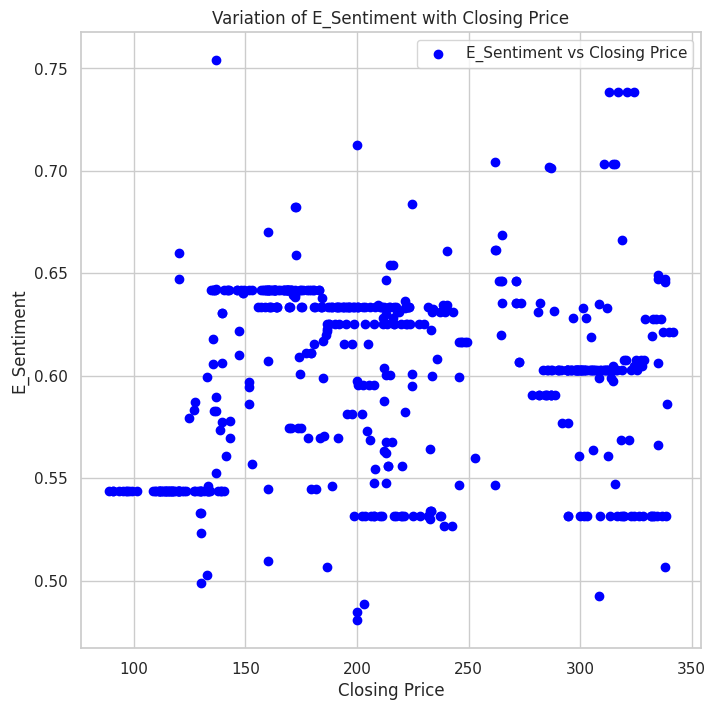

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(df['close'], df['e_sentiment'], color='blue', label='E_Sentiment vs Closing Price')
plt.title('Variation of E_Sentiment with Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('E_Sentiment')
plt.legend()
plt.grid(True)
plt.show()


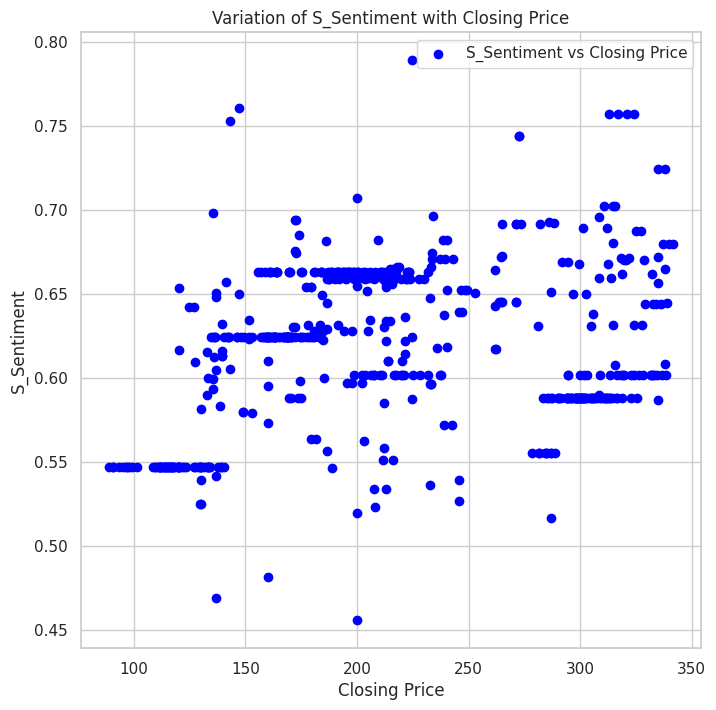

In [42]:
# Plotting
plt.figure(figsize=(8,8))
plt.scatter(df['close'], df['s_sentiment'], color='blue', label='S_Sentiment vs Closing Price')
plt.title('Variation of S_Sentiment with Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('S_Sentiment')
plt.legend()
plt.grid(True)
plt.show()

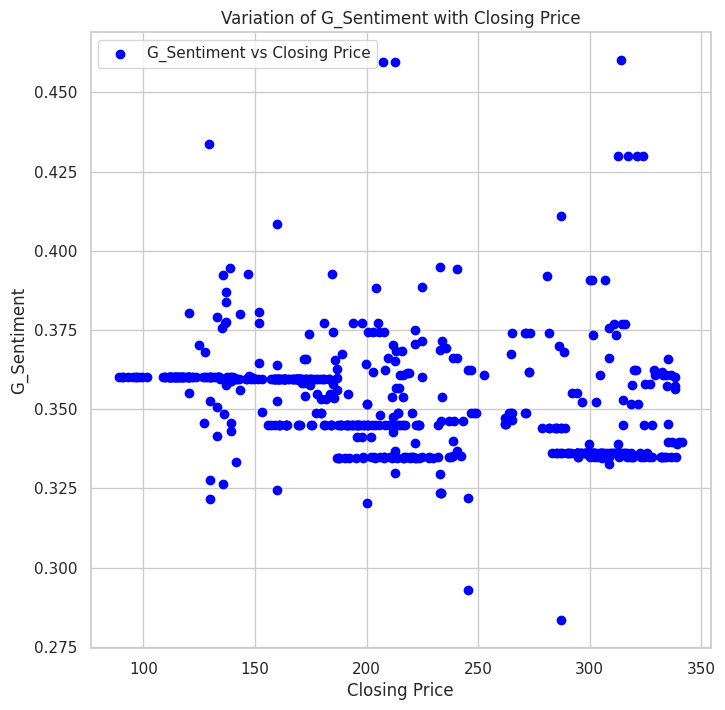

In [43]:
# Plotting
plt.figure(figsize=(8,8))
plt.scatter(df['close'], df['g_sentiment'], color='blue', label='G_Sentiment vs Closing Price')
plt.title('Variation of G_Sentiment with Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('G_Sentiment')
plt.legend()
plt.grid(True)
plt.show()

## it can be noted that with increase in e, s and g sentiments the close price is increasing

# **Statistical Analysis**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        534 non-null    object 
 1   sentiment_score             534 non-null    float64
 2   Economy - Monetary          534 non-null    float64
 3   Financial Markets           534 non-null    float64
 4   Earnings                    534 non-null    float64
 5   Mergers & Acquisitions      534 non-null    float64
 6   Technology                  534 non-null    float64
 7   Finance                     534 non-null    float64
 8   Real Estate & Construction  534 non-null    float64
 9   Energy & Transportation     534 non-null    float64
 10  Economy - Fiscal            534 non-null    float64
 11  Retail & Wholesale          534 non-null    float64
 12  Manufacturing               534 non-null    float64
 13  Blockchain                  534 non

In [44]:
df.describe()

,sentiment_score,Economy - Monetary,Financial Markets,Earnings,Mergers & Acquisitions,Technology,Finance,Real Estate & Construction,Energy & Transportation,Economy - Fiscal,...,Economy - Macro,open,high,low,close,volume,Monthly_Change,e_sentiment,s_sentiment,g_sentiment
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,...,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02,533.000000,534.000000,534.000000,534.000000
mean,0.083225,0.411817,0.525344,0.543977,0.209438,0.710238,0.642962,0.615070,0.663511,0.188620,...,0.207763,215.448687,219.162292,212.294100,215.751676,3.003505e+07,-0.025741,0.600629,0.618382,0.353005
std,0.095843,0.045543,0.044678,0.061936,0.039602,0.049473,0.079631,0.088453,0.087541,0.030873,...,0.040289,69.510122,69.991741,68.671183,69.327675,1.971608e+07,6.827863,0.045509,0.048836,0.018678
min,-0.156614,0.249913,0.108179,0.209725,0.133113,0.420370,0.427569,0.291666,0.333333,0.158519,...,0.158519,90.080000,90.457600,88.090000,88.910000,5.467488e+06,-85.240000,0.480777,0.455648,0.283374
25%,0.002356,0.382534,0.497703,0.514349,0.180366,0.686458,0.616985,0.554233,0.635749,0.170236,...,0.188984,161.691250,165.287500,159.317500,161.145000,1.955056e+07,-2.410000,0.555957,0.587735,0.336077
50%,0.136785,0.414848,0.523261,0.526120,0.202265,0.707756,0.656780,0.644385,0.693910,0.176439,...,0.192314,204.617500,208.805000,201.390000,205.540000,2.539837e+07,0.000000,0.602641,0.624468,0.353067
75%,0.154303,0.443624,0.544664,0.570603,0.234681,0.736528,0.680147,0.665315,0.703439,0.200979,...,0.223040,287.412500,290.322500,284.415000,287.032500,3.366994e+07,2.930000,0.633840,0.659028,0.360265
max,0.309586,0.595437,1.000000,0.736229,0.614606,1.000000,1.000000,1.000000,1.000000,0.367404,...,0.644991,340.130000,343.085400,338.580000,341.490000,2.323166e+08,35.650000,0.754006,0.788884,0.460153


In [45]:
stock_df.head()

,open,close,high,low,volume,sentiment_score,open-high,open-low,close-high,close-low,high-low,open-close,Year,Monthly_Change,Daily Return
date,,,,,,,,,,,,,,,
2022-01-03,338.295,338.54,341.0816,337.1900,14562849,-0.123265,-2.7866,1.1050,-2.5416,1.3500,3.8916,-0.245,2022,NaN,NaN
2022-01-04,339.950,336.53,343.0854,331.8711,15997974,-0.123265,-3.1354,8.0789,-6.5554,4.6589,11.2143,3.420,2022,1.655,-0.005937
2022-01-05,333.020,324.17,335.7600,323.8400,20564521,-0.123265,-2.7400,9.1800,-11.5900,0.3300,11.9200,8.850,2022,-6.930,-0.036728
2022-01-06,322.820,332.46,339.1650,322.7200,27962809,-0.123265,-16.3450,0.1000,-6.7050,9.7400,16.4450,-9.640,2022,-10.200,0.025573
2022-01-07,332.740,331.79,337.0000,328.8801,14722020,-0.123265,-4.2600,3.8599,-5.2100,2.9099,8.1199,0.950,2022,9.920,-0.002015


In [46]:
print('Highest Stock Price Between 2022 and 2024:-',max(stock_df['high']))
print('Maximum Stock Price in 2023:-',max(stock_data_2023['high']))
print('Maximum Stock Price in 2022:-',max(stock_data_2022['high']))

Highest Stock Price Between 2022 and 2024:- 343.0854
Maximum Stock Price in 2023:- 342.92
Maximum Stock Price in 2022:- 343.0854


In [69]:
stock_df.loc['2022-11-07']

open               9.478000e+01
close              9.672000e+01
high               9.688000e+01
low                9.310000e+01
volume             8.198730e+07
sentiment_score    1.491888e-01
open-high         -2.100000e+00
open-low           1.680000e+00
close-high        -1.600000e-01
close-low          3.620000e+00
high-low           3.780000e+00
open-close        -1.940000e+00
Year               2.022000e+03
Monthly_Change     4.430000e+00
Daily Return       6.531556e-02
Name: 2022-11-07 00:00:00, dtype: float64

In [65]:
stock_df.loc['2022-01-05']

open               3.330200e+02
close              3.241700e+02
high               3.357600e+02
low                3.238400e+02
volume             2.056452e+07
sentiment_score   -1.232655e-01
open-high         -2.740000e+00
open-low           9.180000e+00
close-high        -1.159000e+01
close-low          3.300000e-01
high-low           1.192000e+01
open-close         8.850000e+00
Year               2.022000e+03
Monthly_Change    -6.930000e+00
Daily Return      -3.672778e-02
Name: 2022-01-05 00:00:00, dtype: float64

In [47]:
print('Lowest Stock Price Between 2022 and 2024:-',min(stock_df['low']))
print('Minimum Stock Price in 2023:-',min(stock_data_2023['low']))
print('Minimum Stock Price in 2022:-',min(stock_data_2022['low']))

Lowest Stock Price Between 2022 and 2024:- 88.09
Minimum Stock Price in 2023:- 117.74
Minimum Stock Price in 2022:- 88.09


# Obtaining sentiment of the day on which highest stock and lowest price was recorded

In [48]:
for r in range(len(df)):
  if df.iloc[r,:]['high']==max(df['high']):
    print(df.iloc[r,:]['date'])
    print(df.iloc[r,:]['sentiment_score'])

2022-01-04
-0.1232654691358024


In [49]:
for r in range(len(df)):
  if df.iloc[r,:]['low']==min(df['low']):
    print(df.iloc[r,:]['date'])
    print(min(df['low']))
    print(df.iloc[r,:]['sentiment_score'])

2022-11-04
88.09
0.1491888010362693


# Obtaining sentiment of the day on which maximum and minimum stock price was recorded (2023)

In [50]:
for r in range(len(stock_data_2023)):
  if stock_data_2023.iloc[r,:]['high']==max(stock_data_2023['high']):
    print(stock_data_2023.iloc[r].name)
    print(max(stock_data_2023['high']))
    print(stock_data_2023.iloc[r,:]['sentiment_score'])

2023-11-22 00:00:00
342.92
0.1644627169999999


In [51]:
for r in range(len(stock_data_2023)):
  if stock_data_2023.iloc[r,:]['low']==min(stock_data_2023['low']):
    print(stock_data_2023.iloc[r].name)
    print(min(stock_data_2023['low']))
    print(stock_data_2023.iloc[r,:]['sentiment_score'])

2023-01-01 00:00:00
117.74
0.1170146994382022
2023-01-02 00:00:00
117.74
0.1256089970544919


# **Correlation Analysis**

In [52]:
# Create a heatmap of the correlation between stock prices
corr = stock_df[['open', 'high', 'low', 'close']].corr()
corr

,open,high,low,close
open,1.000000,0.999181,0.999069,0.997802
high,0.999181,1.000000,0.999167,0.999023
low,0.999069,0.999167,1.000000,0.999156
close,0.997802,0.999023,0.999156,1.000000


## On Original Features

Correlation Matrix:
                     open      high       low     close    volume  \
open             1.000000  0.999181  0.999069  0.997802 -0.322412   
high             0.999181  1.000000  0.999167  0.999023 -0.314749   
low              0.999069  0.999167  1.000000  0.999156 -0.332235   
close            0.997802  0.999023  0.999156  1.000000 -0.325556   
volume          -0.322412 -0.314749 -0.332235 -0.325556  1.000000   
sentiment_score  0.116973  0.114018  0.126287  0.122173 -0.121713   

                 sentiment_score  
open                    0.116973  
high                    0.114018  
low                     0.126287  
close                   0.122173  
volume                 -0.121713  
sentiment_score         1.000000  


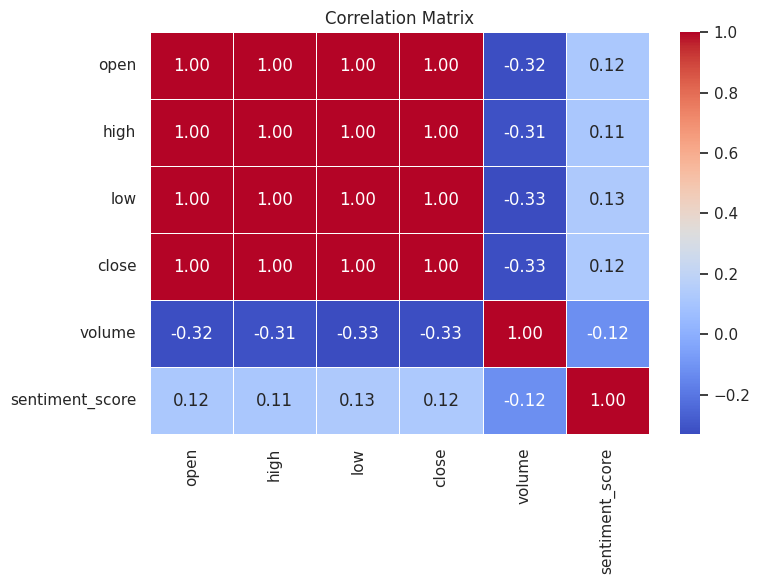

In [53]:
# Calculate the correlation matrix
correlation_matrix = stock_df[['open', 'high', 'low', 'close','volume','sentiment_score']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('Corr-Matrix.png',dpi=400)
plt.show()

* From the above heatmap, you can see a large number of 1s and values close to 1.
* This means those variables show high positive correlations and are interrelated.
* This might be possible because of the comparatively very small difference between those values.
* However, in-stock market this small value is what makes the difference.
* So, what we are going to do, is add new variables to our dataset that represents the difference between those values.

## INTUITION:-
* From the previous heatmap, we could realize that those values aren’t very useful.
* So for more clarity, we will drop those values and take only the new values for creating the heatmap.

## FOCUS:-
* The main variable we are going to focus on in this dataset is the ‘Volume’.
* Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers.
* Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

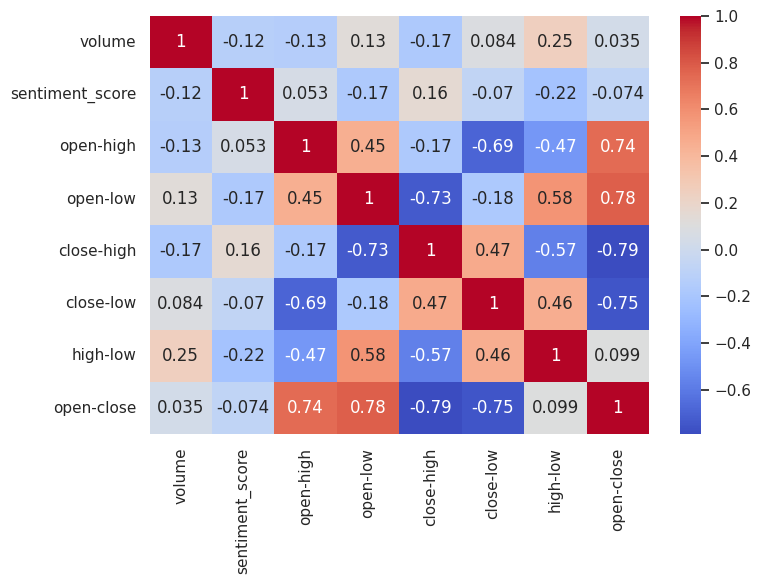

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(data2.corr(),cmap='coolwarm',annot=True)
plt.tight_layout()
plt.savefig('Corr-cus-Matrix.png',dpi=400)

## FINDINGS:-

* The ‘high-low’ feature shows the maximum value of correlation with the ‘volume’ feature.
* Thus we can think that a greater fluctuation in the stock price may be a reason behind more transactions of stocks that day.

* The open-high shows the most negative correlation with the volume feature.
* This means that the greater the difference between the opening value of the stock and the highest value of stock that day, the greater will be the stocks traded that day.
* As there is no information about the number of buyers and sellers, we can only guess that a high difference in opening and highest value of the stock might attract more buyers.
* Whereas a fewer difference may attract more sellers.

In [57]:
df[['sentiment_score','open','high','low','close','volume','e_sentiment','s_sentiment','g_sentiment']].corr()

,sentiment_score,open,high,low,close,volume,e_sentiment,s_sentiment,g_sentiment
sentiment_score,1.000000,0.116973,0.114018,0.126287,0.122173,-0.121713,0.012677,-0.111566,0.241465
open,0.116973,1.000000,0.999181,0.999069,0.997802,-0.322412,0.113038,0.255619,-0.239678
high,0.114018,0.999181,1.000000,0.999167,0.999023,-0.314749,0.112351,0.257125,-0.242114
low,0.126287,0.999069,0.999167,1.000000,0.999156,-0.332235,0.114679,0.255943,-0.235180
close,0.122173,0.997802,0.999023,0.999156,1.000000,-0.325556,0.113596,0.255973,-0.237755
volume,-0.121713,-0.322412,-0.314749,-0.332235,-0.325556,1.000000,-0.224314,-0.180146,-0.018757
e_sentiment,0.012677,0.113038,0.112351,0.114679,0.113596,-0.224314,1.000000,0.635036,0.224293
s_sentiment,-0.111566,0.255619,0.257125,0.255943,0.255973,-0.180146,0.635036,1.000000,0.168190
g_sentiment,0.241465,-0.239678,-0.242114,-0.235180,-0.237755,-0.018757,0.224293,0.168190,1.000000


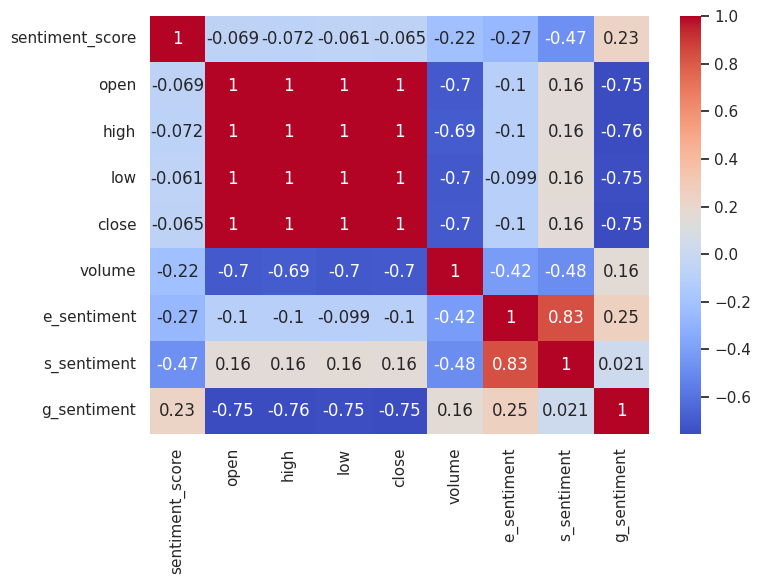

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['sentiment_score','open','high','low','close','volume','e_sentiment','s_sentiment','g_sentiment']].corr().corr(),cmap='coolwarm',annot=True)
plt.tight_layout()
plt.savefig('Corr-new-Matrix.png',dpi=400)